<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터셋 구성
---

In [1]:
import torch

x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [3]:
print(x_train, x_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])


In [4]:
# y= Wx + b 에서 가중치의 초기화 ( W , b)

W = torch.zeros(1, requires_grad=True) # requires_grade = True ---> 학습을 통해서 계속 값이 변경되는 변수임을 의미
b = torch.zeros(1, requires_grad=True)

print(W , b)

tensor([0.], requires_grad=True) tensor([0.], requires_grad=True)


In [5]:
# 가설세우기 
hypo = x_train * W + b

print(hypo)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [6]:
# cost function 정의

cost = torch.mean((hypo - y_train ) ** 2 ) # 평균제곱오촤
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [7]:
# SGD ( 경사하강법 구현하기 )

optimizer = optim.SGD([W,b] , lr = 0.01)

In [8]:
# gradient를 0으로 초기화
optimizer.zero_grad() 

# 비용 함수를 미분하여 gradient 계산
cost.backward() 

# W와 b를 업데이트
# 학습률을 곱하고 빼줌으로써 업데이트까지 다 자동. 
optimizer.step() 

In [14]:
epochs = 1999

for epoch in range(epochs + 1 ):
  hypo = x_train * W + b
  cost = torch.mean((hypo - y_train )** 2 )

  # cost 로 H(x) = W(x) + b 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4}/{} W: {:.3f}, b : {:.3f},  Cost : {:.6f}'.format(
        epoch, epochs, W.item(), b.item(), cost.item()
    ) )

Epoch    0/1999 W: 1.998, b : 0.004,  Cost : 0.000002
Epoch  100/1999 W: 1.999, b : 0.003,  Cost : 0.000001
Epoch  200/1999 W: 1.999, b : 0.002,  Cost : 0.000001
Epoch  300/1999 W: 1.999, b : 0.002,  Cost : 0.000000
Epoch  400/1999 W: 1.999, b : 0.001,  Cost : 0.000000
Epoch  500/1999 W: 2.000, b : 0.001,  Cost : 0.000000
Epoch  600/1999 W: 2.000, b : 0.001,  Cost : 0.000000
Epoch  700/1999 W: 2.000, b : 0.001,  Cost : 0.000000
Epoch  800/1999 W: 2.000, b : 0.001,  Cost : 0.000000
Epoch  900/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1000/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1100/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1200/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1300/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1400/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1500/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1600/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1700/1999 W: 2.000, b : 0.000,  Cost : 0.000000
Epoch 1800/1999 W: 2.000, b 

### Optimizer.zero_grad()가 필요한 이유
---
  파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다. 



In [20]:
import torch

w = torch.tensor(2.0, requires_grad= True)

epochs = 20
# optimizer = optim.SGD([w], lr=0.01)

for epoch in range(epochs+1):
  z = 2 * w
  # optimizer.zero_grad()
  z.backward()

  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


### torch.manual_seed() 
---
  seed는 고정해줘야 난수에 영향 안받고, 수행가능하지~

## 자동 미분 ( Autograd) 


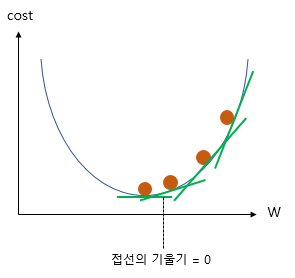

### 실습
---
$$ 2w^2 + 5 \, 라는\,식을\, 세워보고, \,w에\,대해\, 미분해보자 $$

In [28]:
w = torch.tensor(2.0, requires_grad= True)

y = w ** 2 # w^2
z = 2 * y + 5 # 2w^2 + 5

In [29]:
z.backward()
print('수식을 w = 2 로 미분한 값 {}'.format(w.grad))

수식을 w = 2 로 미분한 값 8.0


## 2. 다중 선형 회귀 (Multivariable Linear regression)
---
  

$$ H(x) = w_1x_1 + w_2x_2+w_3x_3 + b $$

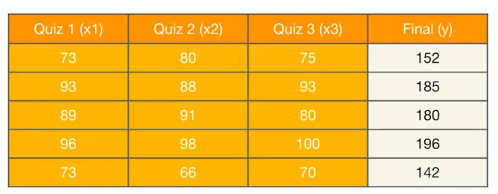

In [30]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [31]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [34]:
# optimizer 설정

optimizer = optim.SGD([w1, w2, w3, b] , lr= 1e-5)

epochs = 1000
for epoch in range(epochs + 1 ):

  hypothesis = x1_train * w1 + x2_train * w2 + x3_train *w3 + b

  # cost 를 계산
  cost = torch.mean((hypothesis - y_train) ** 2 )

  # cost 로 H(x)를 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번 마다 로그 출력
  if epoch % 200 == 0 :
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.459 w2: 0.458 w3: 0.464 b: 0.005 Cost: 9298.520508
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.496967
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375144
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.265695
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167346
Epoch 1000/1000 w1: 0.718 w2: 0.612 w3: 0.680 b: 0.009 Cost: 1.078964


### 벡터와 행렬 연산으로 바꾸기
---
  일일이 w, x 를 선언하는건 비효율적이다. 이를 해결하기 위해 행렬 곱셈 연산을 사용

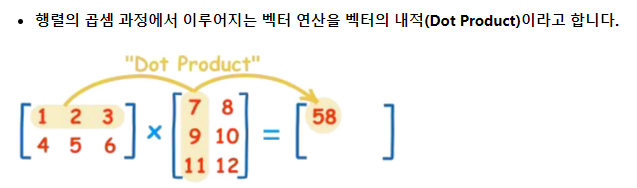

#### 벡터 연산으로 이해해보면
---
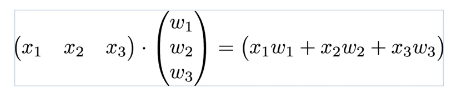

$$ H(X) = XW $$

#### 행렬 연산으로 이해해보면
---
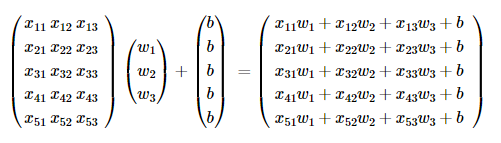

$$H(X) = XW + B$$

### 행렬 연산을 고려하여 같은 걸 구현해보자

In [35]:
# 우선 데이터들 또한 행렬로 바꿔줘야해
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [41]:
# W와 b 또한 설정

W = torch.zeros( (3,1) , requires_grad= True ) # 5 x 3 (x_train.shape) 이랑 곱할수 있는 형태로 만들어줘야해 
b = torch.zeros(1, requires_grad= True)


In [42]:
# 가설설정

hypothesis = x_train.matmul(W) + b

In [45]:
optimizer = optim.SGD([W,b], lr = 1e-5)

epochs = 20
for epoch in range(epochs + 1 ):
  # H(x) 계산
  hypothesis = x_train.matmul(W) + b
  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2 )

  # H(X) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    1/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    2/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    3/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    4/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    5/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    6/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    7/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    8/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch    9/20 hypothesis: tensor([153.5285, 184.4835, 175.1338, 197.9415, 140.7325]) Cost: 

## nn.Module로 구현하는 선형 회귀
---
  파이토치에서 구현되어져 있는걸로 쉽게 해보자!

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)


In [52]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

# 모델을 선언 및 초기화 / input_dim = 1 , output_dim = 1
model = nn.Linear(1,1)

In [53]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [56]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 2000
for epoch in range(epochs+1):
  prediction = model(X_train)

  # loss 계산
  cost = F.mse_loss(prediction, y_train)

  # H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch : {:4d} / {}, Cost : {:.6f}'.format(
        epoch, epochs, cost
    ))

Epoch :    0 / 2000, Cost : 0.078748
Epoch :  100 / 2000, Cost : 0.048661
Epoch :  200 / 2000, Cost : 0.030070
Epoch :  300 / 2000, Cost : 0.018581
Epoch :  400 / 2000, Cost : 0.011482
Epoch :  500 / 2000, Cost : 0.007095
Epoch :  600 / 2000, Cost : 0.004384
Epoch :  700 / 2000, Cost : 0.002709
Epoch :  800 / 2000, Cost : 0.001674
Epoch :  900 / 2000, Cost : 0.001035
Epoch : 1000 / 2000, Cost : 0.000639
Epoch : 1100 / 2000, Cost : 0.000395
Epoch : 1200 / 2000, Cost : 0.000244
Epoch : 1300 / 2000, Cost : 0.000151
Epoch : 1400 / 2000, Cost : 0.000093
Epoch : 1500 / 2000, Cost : 0.000058
Epoch : 1600 / 2000, Cost : 0.000036
Epoch : 1700 / 2000, Cost : 0.000022
Epoch : 1800 / 2000, Cost : 0.000014
Epoch : 1900 / 2000, Cost : 0.000008
Epoch : 2000 / 2000, Cost : 0.000005


In [57]:
new_var = torch.FloatTensor([[4]])

pred_y = model(new_var)
print('예측값 ', pred_y)

예측값  tensor([[7.9954]], grad_fn=<AddmmBackward0>)


In [59]:
# 예측 parameter를 보자
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9974]], requires_grad=True), Parameter containing:
tensor([0.0060], requires_grad=True)]


과정을 정리해보면
  * H(X) 식에 x로부터 예측된 y를 얻는 것을 forward 연산이라고 하고
  * 학습 전, prediction = model(x_train)은 x_train으로 부터 예측값을 리턴 하는 forward
  * 학습 후, pred_y = model(new_var)는 임의의 값 new_var로부터 예측값을 리턴하므로 forward
  * 학습 과정에서 비용 함수(cost, 손실함수)를 미분하여 기울기를 구하는 것을 backward연산 (stochastic gradient descent를 하는 과정)
  * cost.backward()는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산

### 다중 선형 회귀 구현
---
  nn.Linear 동일하게 사용해서

$$ 동일한 \, 가설 $$
$$ H(X) =  w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

In [76]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [77]:
x_train.shape

torch.Size([5, 3])

In [78]:
# input 차원은 당연히 3차원이다. (x가 3개지요)
# output 차원은 당연히 값을 1개 예측하므로 1차원 
model = nn.Linear(3, 1)

In [79]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0803, -0.0707,  0.1601]], requires_grad=True), Parameter containing:
tensor([0.0285], requires_grad=True)]


In [80]:
# 여기서 lr 은 0.01로 하게되면 발산하게 된다. 

# 실험
# cost가 nan 값이 나온다 (?) --> 발산함을 확인
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)


In [83]:
epochs = 2000
for epoch in range(epochs + 1):
  prediction = model(x_train)

  cost = F.mse_loss(prediction, y_train)

  # H(x) Tunning 
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'{epoch} / {epochs} , cost : {cost.item():.3f}')

0 / 2000 , cost : 0.432
100 / 2000 , cost : 0.429
200 / 2000 , cost : 0.425
300 / 2000 , cost : 0.422
400 / 2000 , cost : 0.418
500 / 2000 , cost : 0.415
600 / 2000 , cost : 0.412
700 / 2000 , cost : 0.409
800 / 2000 , cost : 0.406
900 / 2000 , cost : 0.404
1000 / 2000 , cost : 0.401
1100 / 2000 , cost : 0.398
1200 / 2000 , cost : 0.396
1300 / 2000 , cost : 0.393
1400 / 2000 , cost : 0.391
1500 / 2000 , cost : 0.389
1600 / 2000 , cost : 0.387
1700 / 2000 , cost : 0.385
1800 / 2000 , cost : 0.383
1900 / 2000 , cost : 0.381
2000 / 2000 , cost : 0.379


In [84]:
new_var = torch.FloatTensor([[73,80,75]])

pred_y = model(new_var)

print('예측한 값 ', pred_y)

예측한 값  tensor([[151.3241]], grad_fn=<AddmmBackward0>)


In [85]:
# 학습 후 파라미터 확인~
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8146, 0.4438, 0.7508]], requires_grad=True), Parameter containing:
tensor([0.0441], requires_grad=True)]


## Class로 위 과정 구현하기
---

  익숙해지기

In [94]:

class Model(nn.Module): # 대부분의 모델은 PyTorch의 nn.Module을 상속받는다.
  def __init__(self):  # 클래스 초기화
    super().__init__() # nn.Module 클래스의 속성들을 가지고 초기화 
    self.linear = nn.Linear(1,1) # input_dim, output_dim 만 바꾸면 다중도 동일한 방법이겠죠? 
  
  def forward(self, x): 
    return self.linear(x)


In [95]:
model = Model()

In [99]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

optimizer = optim.SGD(model.parameters(), lr = 0.01 )

In [100]:
# Training 그대로
epochs = 2000
for epoch in range(epochs + 1 ):
  prediction = model(X_train)
  
  cost = F.mse_loss(prediction, y_train)
  
  # H(x) 개선
  optimizer.zero_grad() # 초기화
  cost.backward() # backward를 통해 cost 최소화 Local Minimum 을 찾자
  optimizer.step() # 진행! Update

  if epoch % 200 == 0 :
    print(f'{epoch} / {epochs}, Cost : {cost:.3f}')
  




0 / 2000, Cost : 20.807
200 / 2000, Cost : 0.026
400 / 2000, Cost : 0.010
600 / 2000, Cost : 0.004
800 / 2000, Cost : 0.001
1000 / 2000, Cost : 0.001
1200 / 2000, Cost : 0.000
1400 / 2000, Cost : 0.000
1600 / 2000, Cost : 0.000
1800 / 2000, Cost : 0.000
2000 / 2000, Cost : 0.000
